In [16]:
from auditory_cortex.datasets import BaselineDataset, DNNDataset
import numpy as np
import naplib as nl
from auditory_cortex.datasets import BaselineDataset, DNNDataset
from auditory_cortex.computational_models.encoding import TRF
from sklearn.linear_model import RidgeCV, ElasticNet, Ridge, PoissonRegressor

import matplotlib.pyplot as plt
%matplotlib inline

#### mVocs

In [1]:
session = 200206
bin_width = 50
model_name = 'spect2vec'
layer_ID = 0
mVocs = True
dataset = DNNDataset(session, bin_width, model_name, layer_ID, mVocs=mVocs)

/home/ahmedb/projects/Wav2Letter/deepspeech.pytorch/deepspeech_pytorch/loader/data_loader.py:17: UserWarning: torchaudio._backend.set_audio_backend has been deprecated. With dispatcher enabled, this function is no-op. You can remove the function call.
  torchaudio.set_audio_backend("sox_io")


Using default normalizer file...
NeuralData:  Creating object for session: 200206 ... Done.
DNNDataset: Loading data for session-200206 at bin_width-50ms.
DataLoader: Extracting spikes for session-200206...
NeuralData: Reading mVocs spikes for 200206. 
Reading raw features from /scratch/gilbreth/ahmedb/cache/mVocs/spect2vec/spect2vec_raw_features.pkl
Resamping ANN features at bin-width: 50


In [2]:
train_x, train_y = dataset.get_data()

In [8]:
testing_stim_ids = dataset.get_testing_stim_ids(True)

In [9]:
testing_stim_ids

[7, 9, 12, 15, 24, 29, 30, 33, 44, 45, 48]

In [3]:
test_x, test_y = dataset.get_test_data()

In [17]:
np.concatenate([x for x in test_x]).shape

(231, 80)

In [14]:
test_y.shape

(15, 231, 64)

In [10]:
train_x[0].shape

(31, 80)

In [11]:
train_y[0].shape

(31, 64)

In [23]:
from auditory_cortex.neural_data import NeuralMetaData
metadata = NeuralMetaData()
sessions = metadata.get_all_available_sessions()

In [25]:
sessions[37:45]

array(['200213', '200219', '200313', '200318'], dtype='<U6')

#### trf_300

In [1]:
import numpy as np
import naplib as nl
from auditory_cortex.datasets import BaselineDataset, DNNDataset
from auditory_cortex.computational_models.encoding import TRF
from sklearn.linear_model import RidgeCV, ElasticNet, Ridge, PoissonRegressor

import matplotlib.pyplot as plt
%matplotlib inline

2024-06-20 10:41:02.046728: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-20 10:41:03.047230: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /apps/gilbreth/cuda-toolkit/cuda-11.2.0/extras/CUPTI/lib64:/apps/gilbreth/cuda-toolkit/cuda-11.2.0/lib64:/apps/spack/gilbreth/apps/intel-mpi/2017.1.132-intel-17.0.1-p7yx74h/compilers_and_libraries_2017.1.132/linux/mpi/intel64/lib:/apps/spack/gilbreth/apps/intel-mpi/2017.1.132-intel-17.0.1-p7yx74h/compilers_and_libraries_2017.1.132/linux/mpi/mic/lib:/apps/spack/gilbreth/apps/intel-parallel-studio/cl

In [2]:
from auditory_cortex.analyses import Correlations
model_name = 'whisper_tiny'
identifier = 'trf_300'
corr_obj = Correlations(
		model_name=model_name+'_'+identifier,
		)

Using default normalizer file...


In [5]:
bin_width=50
delay=0
normalized=True

column='session'
poisson_normalizer=True
use_stat_inclusion=False
inclusion_p_threshold = 0.01
use_poisson_null=True

area='core'
threshold= corr_obj.get_normalizer_threshold(
	bin_width=bin_width, poisson_normalizer=poisson_normalizer,
)
data_dist_core = corr_obj.get_corr_all_layers_for_bin_width(
		neural_area=area, bin_width=bin_width, delay=delay,
		threshold=threshold, normalized=normalized,
		column=column, use_stat_inclusion=use_stat_inclusion,
		inclusion_p_threshold=inclusion_p_threshold,
		use_poisson_null=use_poisson_null,

	)
np.unique(data_dist_core[2])

Reading exisiting normalizer thresholds...
Extracting column: session
Retreiving data using normalizer threshold..


array([180627., 180719., 180720., 180731., 180807., 180808., 180814.,
       190606., 191113., 191125., 191206., 200206., 200207., 200213.])

In [3]:
bin_width=50
delay=0
normalized=True

column='session'
poisson_normalizer=True
use_stat_inclusion=False
inclusion_p_threshold = 0.01
use_poisson_null=True

area='non-primary'
threshold= corr_obj.get_normalizer_threshold(
	bin_width=bin_width, poisson_normalizer=poisson_normalizer,
)
data_dist_core = corr_obj.get_corr_all_layers_for_bin_width(
		neural_area=area, bin_width=bin_width, delay=delay,
		threshold=threshold, normalized=normalized,
		column=column, use_stat_inclusion=use_stat_inclusion,
		inclusion_p_threshold=inclusion_p_threshold,
		use_poisson_null=use_poisson_null,

	)

Reading exisiting normalizer thresholds...
Extracting column: session
Retreiving data using normalizer threshold..


In [4]:
np.unique(data_dist_core[2])

array([180613., 180728., 180730., 191121., 191210., 200205., 200219.])

In [9]:
# session = 190726
session = 200213
sig_channels = corr_obj.data[(corr_obj.data['session']==session) &\
	(corr_obj.data['normalizer']>threshold) &\
	(corr_obj.data['layer']==3)
	]['channel']
print(f"Number of sig. channels for session: {session} = {sig_channels.size}")
sig_channels.astype(int)

Number of sig. channels for session: 200213 = 14


6638     1
6664    27
6668    31
6672    35
6673    36
6674    37
6675    38
6676    39
6677    40
6679    42
6680    43
6692    55
6694    57
6696    59
Name: channel, dtype: int64

In [57]:
sig_channels.astype(int)

6389     2
6390     3
6396     9
6397    10
6399    12
6408    21
6430    43
6433    46
6445    58
Name: channel, dtype: int64

In [53]:
corr_obj.data[(corr_obj.data['session']==191121) &\
	(corr_obj.data['normalizer']>threshold) &\
	(corr_obj.data['layer']==2)
	]

,session,layer,channel,bin_width,delay,test_cc_raw,normalizer,opt_lag,opt_lmbda,N_sents,poiss_entropy,uncertainty_per_spike,bits_per_spike_NLB,layer_type,normalized_test_cc
4250,191121.0,2.0,8.0,50.0,0.0,0.393151,0.333173,300.0,5.0,500.0,0.0,0.0,0.0,transformer,0.681121
4254,191121.0,2.0,12.0,50.0,0.0,0.266610,0.182401,300.0,5.0,500.0,0.0,0.0,0.0,transformer,0.624256
4258,191121.0,2.0,16.0,50.0,0.0,0.344396,0.250856,300.0,5.0,500.0,0.0,0.0,0.0,transformer,0.687616
4263,191121.0,2.0,21.0,50.0,0.0,0.261057,0.177854,300.0,5.0,500.0,0.0,0.0,0.0,transformer,0.619018
4278,191121.0,2.0,36.0,50.0,0.0,0.197591,0.176845,300.0,5.0,500.0,0.0,0.0,0.0,transformer,0.469864
4280,191121.0,2.0,38.0,50.0,0.0,0.253940,0.173214,300.0,5.0,500.0,0.0,0.0,0.0,transformer,0.610155
4301,191121.0,2.0,59.0,50.0,0.0,0.375656,0.334649,300.0,5.0,500.0,0.0,0.0,0.0,transformer,0.649374


### visualizing the TRF weights..

In [2]:
session = 200206
bin_width=50
model_name = 'whisper_tiny'
layer_ID=3

dataset = DNNDataset(session, bin_width, model_name, layer_ID)

Using default normalizer file...
DNNDataset: Loading data for session-200206 at bin_width-50ms.
DataLoader: Extracting spikes for session-200206...
NeuralData:  Creating object for session: 200206 ... Done.
NeuralData: Reading neural spikes for 200206. 
Reading raw features from /scratch/gilbreth/ahmedb/cache/whisper_tiny/whisper_tiny_raw_features.pkl
Resamping ANN features at bin-width: 50


In [16]:
tmin=0
opt_lag=300
num_workers=1
opt_lmbda = 1e4

estimator = Ridge(alpha=opt_lmbda)
sfreq = 1000/dataset.bin_width
tmax = opt_lag/1000 # convert seconds to ms
trf_model = nl.encoding.TRF(
		tmin, tmax, sfreq, estimator=estimator,
		n_jobs=num_workers, show_progress=True
		)

In [18]:
mapping_x, mapping_y = dataset.get_data()
trf_model.fit(X=mapping_x, y=mapping_y)

  0%|          | 0/64 [00:00<?, ?it/s]

TRF(estimator=Ridge(alpha=10000.0), sfreq=20.0, tmax=0.3, tmin=0)

Text(0.5, 0, 'lags')

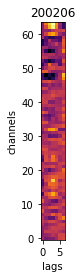

In [37]:
ch = 4
coeff = trf_model.coef_
coeff = np.mean(coeff, axis=1)
plt.imshow(coeff, origin='lower', cmap='inferno')
plt.title(f"{session}")
plt.ylabel("channels")
plt.xlabel("lags")

### session: 180728

In [83]:
session = 180728
bin_width=50
model_name = 'whisper_tiny'
layer_ID=3

dataset = DNNDataset(session, bin_width, model_name, layer_ID)

Using default normalizer file...
DNNDataset: Loading data for session-180728 at bin_width-50ms.
DataLoader: Extracting spikes for session-180728...
NeuralData:  Creating object for session: 180728 ... Done.
NeuralData: Reading neural spikes for 180728. 
Reading raw features from /scratch/gilbreth/ahmedb/cache/whisper_tiny/whisper_tiny_raw_features.pkl
Resamping ANN features at bin-width: 50


In [84]:
tmin=0
opt_lag=300
num_workers=1
opt_lmbda = 1e5

estimator = Ridge(alpha=opt_lmbda)
sfreq = 1000/dataset.bin_width
tmax = opt_lag/1000 # convert seconds to ms
trf_model = nl.encoding.TRF(
		tmin, tmax, sfreq, estimator=estimator,
		n_jobs=num_workers, show_progress=True
		)

In [85]:
mapping_x, mapping_y = dataset.get_data()
trf_model.fit(X=mapping_x, y=mapping_y)

  0%|          | 0/16 [00:00<?, ?it/s]

TRF(estimator=Ridge(alpha=100000.0), sfreq=20.0, tmax=0.3, tmin=0)

In [86]:
sig_channels = corr_obj.data[(corr_obj.data['session']==session) &\
	(corr_obj.data['normalizer']>threshold) &\
	(corr_obj.data['layer']==3)
	]['channel'].astype(int)

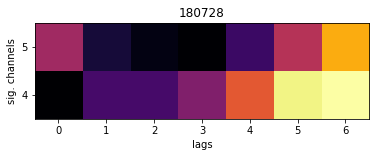

In [87]:
coeff = trf_model.coef_
coeff = np.mean(coeff, axis=1)
plt.imshow(coeff[sig_channels], origin='lower', cmap='inferno')
plt.title(f"{session}")
plt.ylabel("sig. channels")
plt.xlabel("lags")
plt.yticks(np.arange(len(sig_channels)),sig_channels)
plt.show()

### session: 200205

In [88]:
session = 200205
bin_width=50
model_name = 'whisper_tiny'
layer_ID=3

dataset = DNNDataset(session, bin_width, model_name, layer_ID)

Using default normalizer file...
DNNDataset: Loading data for session-200205 at bin_width-50ms.
DataLoader: Extracting spikes for session-200205...
NeuralData:  Creating object for session: 200205 ... Done.
NeuralData: Reading neural spikes for 200205. 
Reading raw features from /scratch/gilbreth/ahmedb/cache/whisper_tiny/whisper_tiny_raw_features.pkl
Resamping ANN features at bin-width: 50


In [89]:
tmin=0
opt_lag=300
num_workers=1
opt_lmbda = 1e5

estimator = Ridge(alpha=opt_lmbda)
sfreq = 1000/dataset.bin_width
tmax = opt_lag/1000 # convert seconds to ms
trf_model = nl.encoding.TRF(
		tmin, tmax, sfreq, estimator=estimator,
		n_jobs=num_workers, show_progress=True
		)

In [90]:
mapping_x, mapping_y = dataset.get_data()
trf_model.fit(X=mapping_x, y=mapping_y)

  0%|          | 0/60 [00:00<?, ?it/s]

TRF(estimator=Ridge(alpha=100000.0), sfreq=20.0, tmax=0.3, tmin=0)

In [91]:
sig_channels = corr_obj.data[(corr_obj.data['session']==session) &\
	(corr_obj.data['normalizer']>threshold) &\
	(corr_obj.data['layer']==3)
	]['channel'].astype(int)
# sig_channels.astype(int)

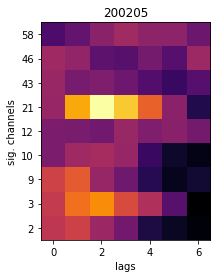

In [92]:
coeff = trf_model.coef_
coeff = np.mean(coeff, axis=1)
plt.imshow(coeff[sig_channels], origin='lower', cmap='inferno')
plt.title(f"{session}")
plt.ylabel("sig. channels")
plt.xlabel("lags")
plt.yticks(np.arange(len(sig_channels)),sig_channels)
plt.show()

### 

### session: 191121

In [67]:
session = 191121
bin_width=50
model_name = 'whisper_tiny'
layer_ID=3

dataset = DNNDataset(session, bin_width, model_name, layer_ID)

Using default normalizer file...
DNNDataset: Loading data for session-191121 at bin_width-50ms.
DataLoader: Extracting spikes for session-191121...
NeuralData:  Creating object for session: 191121 ... Done.
NeuralData: Reading neural spikes for 191121. 
Reading raw features from /scratch/gilbreth/ahmedb/cache/whisper_tiny/whisper_tiny_raw_features.pkl
Resamping ANN features at bin-width: 50


In [68]:
tmin=0
opt_lag=300
num_workers=1
opt_lmbda = 1e5

estimator = Ridge(alpha=opt_lmbda)
sfreq = 1000/dataset.bin_width
tmax = opt_lag/1000 # convert seconds to ms
trf_model = nl.encoding.TRF(
		tmin, tmax, sfreq, estimator=estimator,
		n_jobs=num_workers, show_progress=True
		)

In [70]:
mapping_x, mapping_y = dataset.get_data()
trf_model.fit(X=mapping_x, y=mapping_y)

  0%|          | 0/63 [00:00<?, ?it/s]

TRF(estimator=Ridge(alpha=100000.0), sfreq=20.0, tmax=0.3, tmin=0)

In [69]:
sig_channels = corr_obj.data[(corr_obj.data['session']==session) &\
	(corr_obj.data['normalizer']>threshold) &\
	(corr_obj.data['layer']==3)
	]['channel'].astype(int)

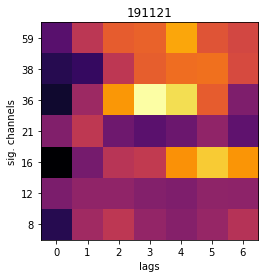

In [76]:
coeff = trf_model.coef_
coeff = np.mean(coeff, axis=1)
plt.imshow(coeff[sig_channels], origin='lower', cmap='inferno')
plt.title(f"{session}")
plt.ylabel("sig. channels")
plt.xlabel("lags")
plt.yticks(np.arange(len(sig_channels)),sig_channels)
plt.show()

### session: 191210

In [78]:
session = 191210
bin_width=50
model_name = 'whisper_tiny'
layer_ID=3

dataset = DNNDataset(session, bin_width, model_name, layer_ID)

Using default normalizer file...
DNNDataset: Loading data for session-191210 at bin_width-50ms.
DataLoader: Extracting spikes for session-191210...
NeuralData:  Creating object for session: 191210 ... Done.
NeuralData: Reading neural spikes for 191210. 
Reading raw features from /scratch/gilbreth/ahmedb/cache/whisper_tiny/whisper_tiny_raw_features.pkl
Resamping ANN features at bin-width: 50


In [79]:
tmin=0
opt_lag=300
num_workers=1
opt_lmbda = 1e5

estimator = Ridge(alpha=opt_lmbda)
sfreq = 1000/dataset.bin_width
tmax = opt_lag/1000 # convert seconds to ms
trf_model = nl.encoding.TRF(
		tmin, tmax, sfreq, estimator=estimator,
		n_jobs=num_workers, show_progress=True
		)

In [80]:
mapping_x, mapping_y = dataset.get_data()
trf_model.fit(X=mapping_x, y=mapping_y)

  0%|          | 0/61 [00:00<?, ?it/s]

TRF(estimator=Ridge(alpha=100000.0), sfreq=20.0, tmax=0.3, tmin=0)

In [81]:
sig_channels = corr_obj.data[(corr_obj.data['session']==session) &\
	(corr_obj.data['normalizer']>threshold) &\
	(corr_obj.data['layer']==3)
	]['channel'].astype(int)

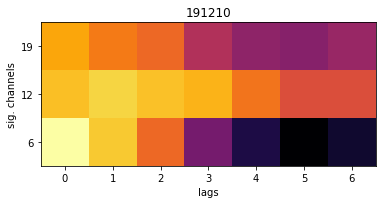

In [82]:
coeff = trf_model.coef_
coeff = np.mean(coeff, axis=1)
plt.imshow(coeff[sig_channels], origin='lower', cmap='inferno')
plt.title(f"{session}")
plt.ylabel("sig. channels")
plt.xlabel("lags")
plt.yticks(np.arange(len(sig_channels)),sig_channels)
plt.show()

In [77]:
session = 191210
corr_obj.data[(corr_obj.data['session']==session) &\
	(corr_obj.data['normalizer']>threshold) &\
	(corr_obj.data['layer']==3)
	]

,session,layer,channel,bin_width,delay,test_cc_raw,normalizer,opt_lag,opt_lmbda,N_sents,poiss_entropy,uncertainty_per_spike,bits_per_spike_NLB,layer_type,normalized_test_cc
6209,191210.0,3.0,6.0,50.0,0.0,0.142681,0.092712,300.0,5.0,500.0,0.0,0.0,0.0,transformer,0.468596
6215,191210.0,3.0,12.0,50.0,0.0,0.144507,0.118112,300.0,5.0,500.0,0.0,0.0,0.0,transformer,0.420477
6222,191210.0,3.0,19.0,50.0,0.0,0.160498,0.113632,300.0,5.0,500.0,0.0,0.0,0.0,transformer,0.476124


### rest of the code..

In [29]:
np.max(coeff)

0.0012065059079679216

In [30]:
np.min(coeff)

-0.0011402374412181888